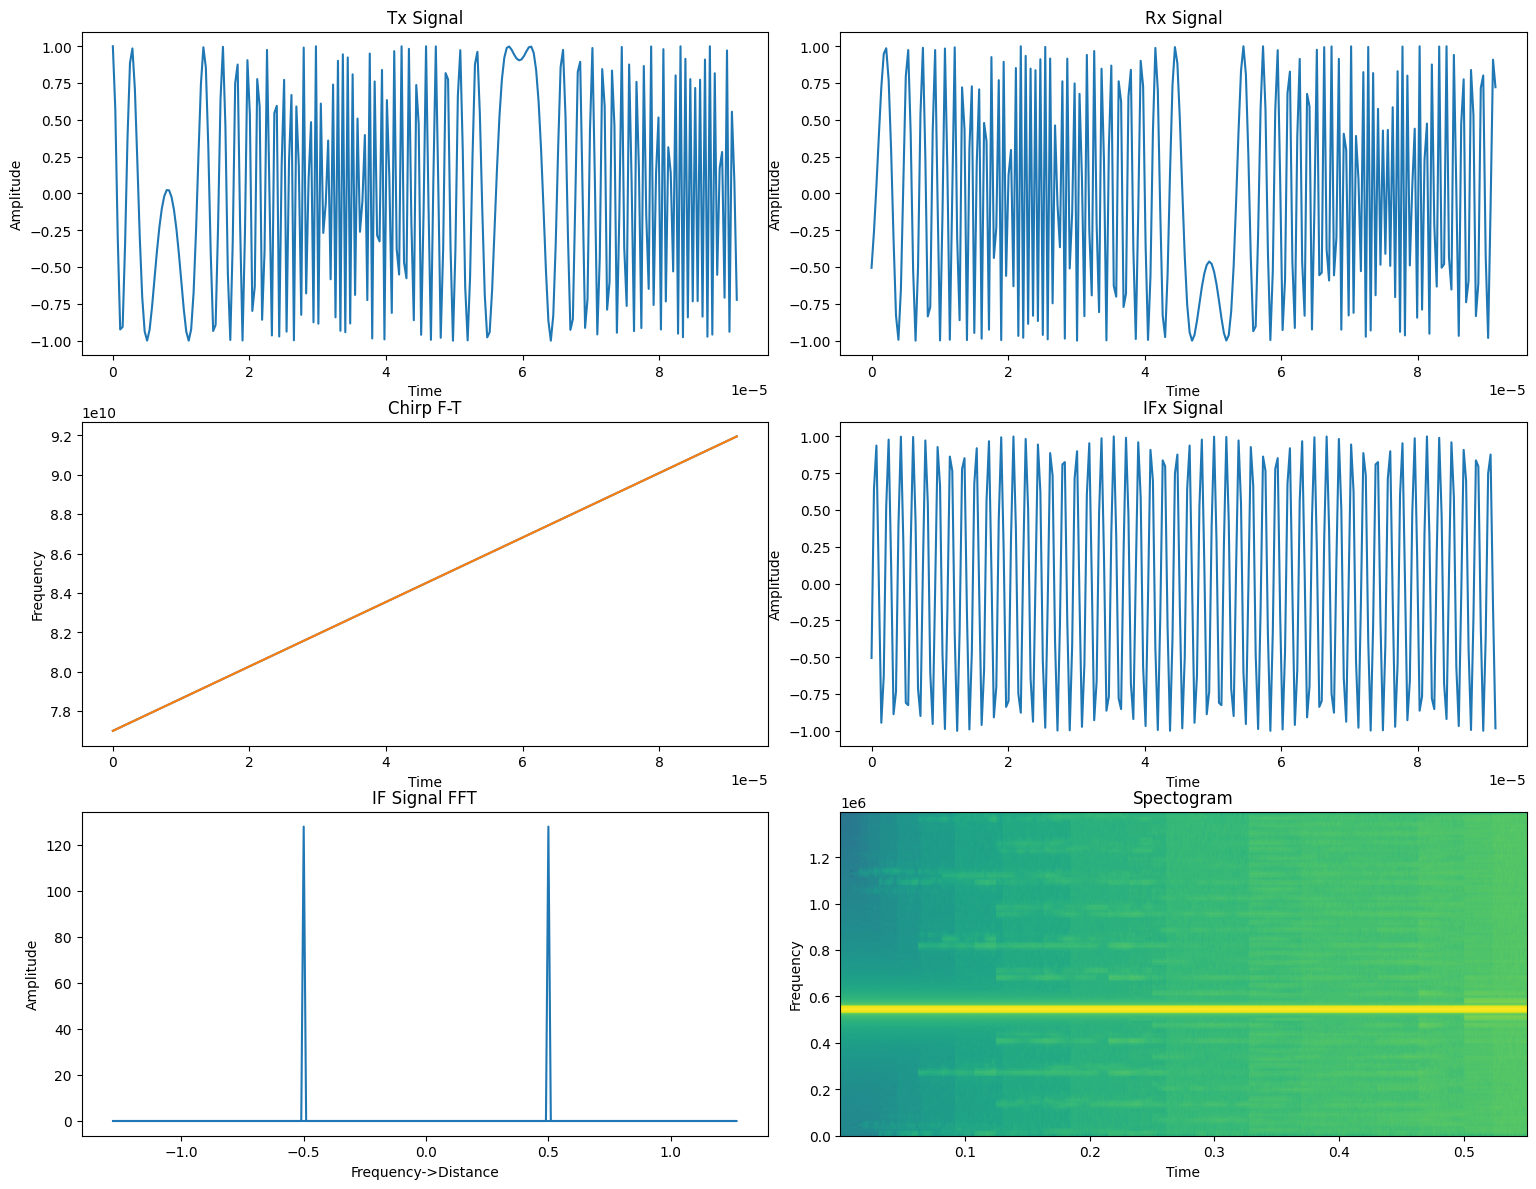

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
from mpl_toolkits.mplot3d import Axes3D

#Radar parameters setting

maxR = 11
rangeRes = 0.01
maxV = 70 
fc = 77e9
c = 3e8 

r0 = 0.5
v0 = 0

B = c/(2*rangeRes)
# Tchirp = 5.5*2*maxR/c
Tchirp = 91.72 * (1e-6)
endle_time = 6.3e-6
slope = B/Tchirp 
f_IFmax = (slope*2*maxR)/c
f_IF = (slope*2*r0)/c 
Nd =  6000
Nr = 256
SAMPLE_COUNT_CHIRP =256
vres = (c/fc)/(2*Nd*(Tchirp+endle_time)) 
Fs = Nr/Tchirp 
#Tx = np.zeros(1,len(t))
#Rx = np.zeros(1,len(t)) 
#Mix = np.zeros(1,len(t)) 

#Tx波函数参数
t = np.linspace(0,Nd*Tchirp,Nr*Nd,endpoint=False) #发射信号和接收信号的采样时间
angle_freq = fc*t+(slope*t*t)/2 #角频率
freq = fc + slope*t #频率
Tx = np.cos(2*np.pi*angle_freq) #发射波形函数
plt.figure(figsize=(16,16))
plt.subplot(4,2,1)
plt.plot(t[0:SAMPLE_COUNT_CHIRP],Tx[0:SAMPLE_COUNT_CHIRP])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Tx Signal')
plt.subplot(4,2,3)
plt.plot(t[0:SAMPLE_COUNT_CHIRP],freq[0:SAMPLE_COUNT_CHIRP])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Tx F-T')

r0 = r0+v0*t

#Rx波函数参数
td = 2*r0/c
tx = t
freqRx = fc + slope*(t)
breathing_freq = 0.2  # Frequency of breathing-like motion in Hz
vibration_amplitude_mm = 1  # Vibration amplitude in millimeters

# Calculate target vibration displacement profile (using a sinusoidal function for breathing-like motion)
vibration_displacement = vibration_amplitude_mm * np.sin(2 * np.pi * breathing_freq * t)

# Calculate the phase shift for the vibration effect in received signal
phase_shift = -2 * np.pi * fc * (vibration_displacement / c)
Rx = np.cos(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2)+phase_shift) #接受波形函数
plt.subplot(4,2,2)
plt.plot(t[0:SAMPLE_COUNT_CHIRP],Rx[0:SAMPLE_COUNT_CHIRP])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Rx Signal')
plt.subplot(4,2,3)
plt.plot(t[0:SAMPLE_COUNT_CHIRP]+td[0:SAMPLE_COUNT_CHIRP],freqRx[0:SAMPLE_COUNT_CHIRP])
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Chirp F-T')

#IF信号函数参数
IF_angle_freq = fc*t+(slope*t*t)/2 - ((fc*(t-td) + (slope*(t-td)*(t-td))/2))
freqIF = slope*td
IFx = np.cos(-(2*np.pi*(fc*(t-td) + (slope*(t-td)*(t-td))/2))+(2*np.pi*angle_freq))
# IFx = Rx * np.conj(Tx)
plt.subplot(4,2,4)
plt.plot(t[0:SAMPLE_COUNT_CHIRP],IFx[0:SAMPLE_COUNT_CHIRP])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('IFx Signal')

#Range FFT
# doppler = 10*np.log10(np.abs(np.fft.fft(IFx[0:1024])))
doppler = np.abs(np.fft.fft(IFx[0:SAMPLE_COUNT_CHIRP]))
frequency = np.fft.fftfreq(SAMPLE_COUNT_CHIRP, 1/Fs)
range = frequency*c/(2*slope)
plt.subplot(4,2,5)
plt.plot(range[0:SAMPLE_COUNT_CHIRP],doppler[0:SAMPLE_COUNT_CHIRP])
plt.xlabel('Frequency->Distance')
plt.ylabel('Amplitude')
plt.title('IF Signal FFT')

#2D plot
plt.subplot(4,2,6)
plt.specgram(IFx,SAMPLE_COUNT_CHIRP,Fs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectogram')

plt.tight_layout(pad=3, w_pad=0.05, h_pad=0.05)
plt.show()

In [123]:
print(IFx.shape)
print(Nd*Nr)

(1536000,)
1536000


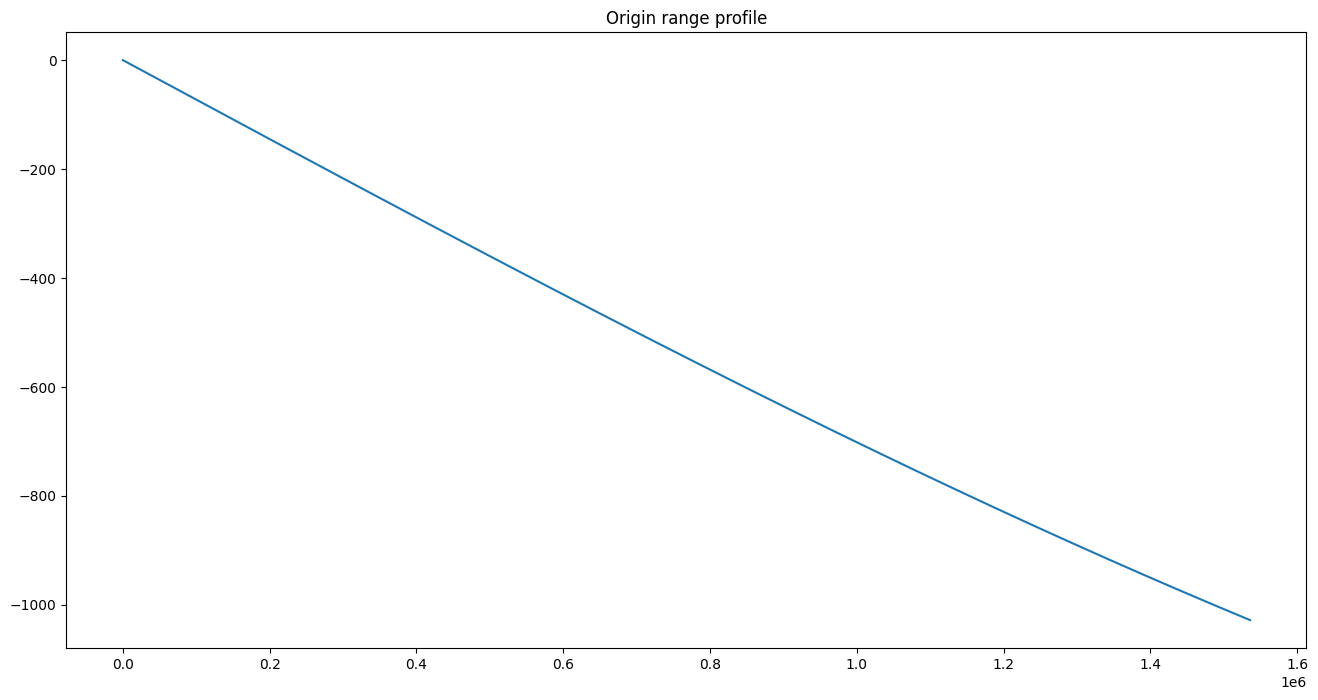

In [130]:
IFMatrix =IFx.reshape(Nd,Nr)
rangeProfiles =[np.fft.fft (IFSignal) for IFSignal in  IFMatrix]
freqs = np.fft.fftfreq(len(rangeProfiles[0]), 1/Fs)
magnitude_range_profile = [np.abs(profile) for profile in rangeProfiles]


doppler = np.abs(np.fft.fft(IFx[0:SAMPLE_COUNT_CHIRP]))
frequency = np.fft.fftfreq(SAMPLE_COUNT_CHIRP, 1/Fs)
range = frequency*c/(2*slope)

plt.figure(figsize=(16,8))
# plt.imshow(magnitude_range_profile,aspect='auto',cmap='jet')
plt.plot(phase_shift)
plt.title("Origin range profile")
plt.show()


10
0.5503199999999999


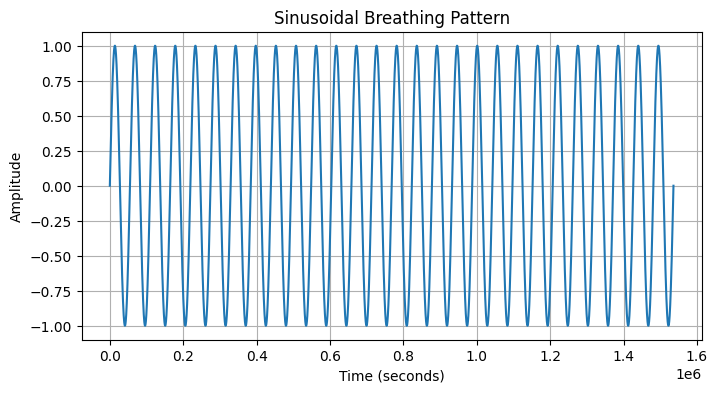

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the breathing model
duration = 10  # Duration of the simulation in seconds
sampling_rate = 100  # Sampling rate in Hz
breath_freq = 0.2  # Breathing frequency in Hz
breath_amplitude = 1  # Amplitude of the breathing pattern

# Generate time array
tt = np.linspace(0,int(Nr*Nd*Tchirp),Nr*Nd,endpoint=False) #发射信号和接收信号的采样时间
print(duration)
print(Nd*Tchirp)

# Generate a sinusoidal breathing pattern
breathing_pattern = breath_amplitude * np.sin(2 * np.pi * breathing_freq * tt)


# Plot the breathing pattern
plt.figure(figsize=(8, 4))
plt.plot( breathing_pattern)
plt.title('Sinusoidal Breathing Pattern')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
